# 4.10 Coding Etiquette & Excel Reporting Part 2

### This script contains the following:
1. Importing libraries
2. Importing data
3. Profiling Instacart customers through variable creation
4. Creating visual demonstrating distribution of customer profiles
5. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

### 1. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Get imports and everything set up to work offline for maps.

import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
# Importing Plotly for the option to create interactive visuals.

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# The line above allows us to use plotly offline (not on their website), so we can use it for visualizations in Python.

print(__version__) # requires version >= 1.9.0

5.9.0


In [4]:
# Importing cufflinks to work with Plotly to call plots directly off of a Pandas dataframe.

import cufflinks as cf

In [5]:
# For Notebooks

init_notebook_mode(connected=True)    # Allows us to see everything we plot inside the Jupyter notebook.

In [6]:
# For offline use.
cf.go_offline() 

### 2. Importing data

In [7]:
# Creating a path for data import.

path = r'C:\Users\keely\Documents\Courses\CareerFoundry\Immersion\Achievement 4 - Python\01-2023 Instacart Basket Analysis'
print(path)

C:\Users\keely\Documents\Courses\CareerFoundry\Immersion\Achievement 4 - Python\01-2023 Instacart Basket Analysis


In [8]:
# Importing latest merged file with normal customer activity for orders, products, and customers data.

df_norm_act = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customers_norm_act.pkl'))

In [9]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [10]:
pd.options.display.max_columns = None

In [11]:
df_norm_act.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,med_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_children,marital_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity


In [13]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [12]:
# Rename unnamed column to department_id. 

df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [13]:
df_dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [15]:
df_dep.shape

(21, 2)

### 3. Profiling Instacart customers through variable creation

#### Number 5 of Task: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

##### a) Income

In [16]:
# Looking at descriptive statistics of income.

df_norm_act['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [17]:
# Creating income brackets.

quartiles_income = list(df_norm_act['income'].quantile([0.25, 0.5, 0.75]))

In [18]:
# Seeing what income thresholds are associated with the different quartiles.

quartiles_income

[67292.0, 96765.0, 128102.0]

In [19]:
# Creating customer profiles for variable "income_level."

df_norm_act.loc[(df_norm_act['income'] <= 67292), 'income_level'] = 'low-income'

df_norm_act.loc[(df_norm_act['income'] > 67292) & (df_norm_act['income'] < 128102), 'income_level'] = 'middle-income'

df_norm_act.loc[(df_norm_act['income'] >= 128102), 'income_level'] = 'high-income'


In [20]:
# Verifying the existance of new column 'income-level'

df_norm_act.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,med_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_children,marital_status,income,region,exclusion_flag,income_level
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income


##### b) Age

In [21]:
# Looking at descriptive statistics of ages.

df_norm_act['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [22]:
# Creating age brackets based on article found here: 
# https://www.sciencedirect.com/topics/computer-science/chronological-age

df_norm_act.loc[(df_norm_act['age'] >= 18) & (df_norm_act['age'] <= 39), 'age_group'] = 'young adult'

df_norm_act.loc[(df_norm_act['age'] >=40 ) & (df_norm_act['age'] <= 59), 'age_group'] = 'middle-aged'

df_norm_act.loc[(df_norm_act['age'] >=60 ) & (df_norm_act['age'] < 75), 'age_group'] = 'older adult'

df_norm_act.loc[(df_norm_act['age'] >= 75), 'age_group'] = 'oldest old'

In [23]:
# Verifying new 'age_group' column was created.

df_norm_act.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,med_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_children,marital_status,income,region,exclusion_flag,income_level,age_group
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult


In [24]:
# Checking age group counts

df_norm_act['age_group'].value_counts(dropna = False)

young adult    10665110
middle-aged     9724950
older adult     7161875
oldest old      3412629
Name: age_group, dtype: int64

In [25]:
10665110 + 9724950 + 7161875 + 3412629

30964564

In [26]:
# Verifying total above is equal to number of records at the end of the last script ( 4.10 part 1).

df_norm_act.shape

(30964564, 35)

##### c) Number of Dependents

In [27]:
# Looking at descriptive statistics of number of children. For those with children, the range here is small, 
# just 1 to 3.

df_norm_act['no_children'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: no_children, dtype: float64

In [28]:
# Looking at counts of number of children. This is fairly evenly distributed.

df_norm_act['no_children'].value_counts()

3    7772516
0    7739681
2    7733261
1    7719106
Name: no_children, dtype: int64

In [29]:
crosstab = pd.crosstab(df_norm_act['marital_status'], df_norm_act['no_children'], dropna = False)

In [30]:
crosstab

no_children,0,1,2,3
marital_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [31]:
df_living_with_relatives = df_norm_act[df_norm_act['marital_status'] == 'living with parents and siblings']

In [32]:
# Trying to find trends in the people with family or marital status as living with parents and siblings.

# Looking at heads and tails, seem to indicate these customers are younger, such as possibly too young to have 
# 2 to three children that are often found in their corresponding no_children column.

df_living_with_relatives.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,med_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_children,marital_status,income,region,exclusion_flag,income_level,age_group
6293,1442654,1137,10,6,11,14.0,False,196,32,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,15,Regular customer,7.95093,Low spender,21.0,Non-frequent customer,Male,Indiana,18,4/23/2019,2,living with parents and siblings,54033,Midwest,normal_activity,low-income,young adult
6294,289494,1137,11,6,11,0.0,False,196,32,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,15,Regular customer,7.95093,Low spender,21.0,Non-frequent customer,Male,Indiana,18,4/23/2019,2,living with parents and siblings,54033,Midwest,normal_activity,low-income,young adult
6295,147278,1137,12,0,13,22.0,False,196,9,1,Soda,77,7,9.0,Mid-range product,Busiest day,Busiest days,Most orders,15,Regular customer,7.95093,Low spender,21.0,Non-frequent customer,Male,Indiana,18,4/23/2019,2,living with parents and siblings,54033,Midwest,normal_activity,low-income,young adult
6296,2546034,1137,13,0,12,21.0,False,196,2,1,Soda,77,7,9.0,Mid-range product,Busiest day,Busiest days,Most orders,15,Regular customer,7.95093,Low spender,21.0,Non-frequent customer,Male,Indiana,18,4/23/2019,2,living with parents and siblings,54033,Midwest,normal_activity,low-income,young adult
6297,1682164,1137,8,3,6,10.0,False,24852,17,0,Banana,24,4,12.3,Mid-range product,Regularly busy,Least busy days,Average orders,15,Regular customer,7.95093,Low spender,21.0,Non-frequent customer,Male,Indiana,18,4/23/2019,2,living with parents and siblings,54033,Midwest,normal_activity,low-income,young adult


In [33]:
df_living_with_relatives['age'].describe() 

count    1.481172e+06
mean     1.950209e+01
std      1.111993e+00
min      1.800000e+01
25%      1.900000e+01
50%      1.900000e+01
75%      2.100000e+01
max      2.100000e+01
Name: age, dtype: float64

##### Because of the very young age of people in the living with parents and siblings category of 'marital_status' (which could have been left 'family_status' given this category), living with parents or siblings category will be eliminated from dependents profiling. This is because this category may not be an accurate representation of parenthood or disposable income. These customers are likely young adults still living at home with their parents.

In [34]:
df_ind_adults = df_norm_act[df_norm_act['marital_status'] != 'living with parents and siblings']

In [35]:
df_ind_adults.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,med_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_children,marital_status,income,region,exclusion_flag,income_level,age_group
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult


In [36]:
df_ind_adults.shape

(29483392, 35)

In [37]:
# Creating family-size or number of dependents category.

df_ind_adults.loc[df_ind_adults['no_children'] == 0, 'family_size'] = 'childless household'
df_ind_adults.loc[(df_ind_adults['no_children'] == 1) | (df_ind_adults['no_children'] == 2), 'family_size'] = 'medium household'
df_ind_adults.loc[df_ind_adults['no_children'] >= 3, 'family_size'] = 'large household'

In [38]:
# Checking the dependent count to ensure it adds up to 29483392.

df_ind_adults['family_size'].value_counts(dropna = False)

medium household       14459664
childless household     7739681
large household         7284047
Name: family_size, dtype: int64

In [39]:
14459664 + 7739681 + 7284047

29483392

In [40]:
# Create a crosstab between dependents and family size.

crosstab_2 = pd.crosstab(df_ind_adults['marital_status'], df_ind_adults['family_size'], dropna = False)

In [41]:
crosstab_2

family_size,childless household,large household,medium household
marital_status,,,
divorced/widowed,2645271,0,0
married,0,7284047,14459664
single,5094410,0,0


##### d) Departments

In [14]:
# Create a data dictionary for departments

dep_dict = dict(zip(df_dep['department_id'], df_dep['department']))

In [15]:
dep_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [16]:
# Create a new column to get department name into the main dataframe.

df_norm_act['department'] = df_norm_act['department_id'].map(dep_dict)

In [17]:
df_norm_act['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [18]:
df_norm_act.shape

(30964564, 34)

### 4. Creating visualizations of customer profiles

#### a) Income Levels

(array([0, 1, 2]),
 [Text(0, 0, 'middle-income'),
  Text(1, 0, 'low-income'),
  Text(2, 0, 'high-income')])

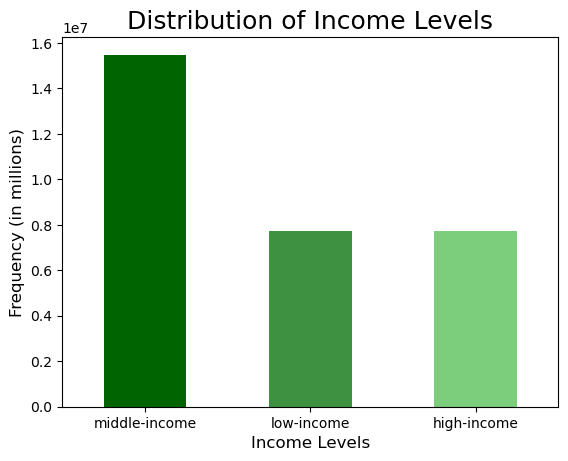

In [49]:
bar_income = df_norm_act['income_level'].value_counts().plot.bar(color = ['darkgreen', '#3D9140', '#7CCD7C'])

plt.title('Distribution of Income Levels', fontsize = 18)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Income Levels', fontsize = 12)
plt.xticks(rotation = 0)

In [50]:
# Exporting income bar chart

bar_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_income.png'))

#### b) Age Groups

(array([0, 1, 2, 3]),
 [Text(0, 0, 'young adult'),
  Text(1, 0, 'middle-aged'),
  Text(2, 0, 'older adult'),
  Text(3, 0, 'oldest old')])

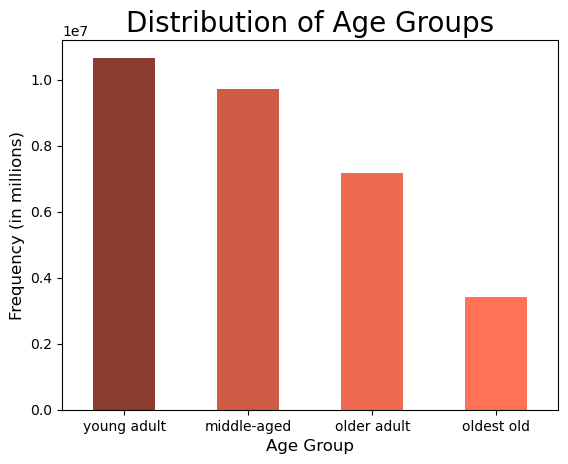

In [50]:
# Creating a bar chart for age groups.

bar_ages = df_norm_act['age_group'].value_counts().plot.bar(color=['#8B3E2F', '#CD5B45', '#EE6A50', '#FF7256'])

plt.title('Distribution of Age Groups', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group', fontsize = 12)
plt.xticks(rotation = 0)

In [51]:
# Exporting bar_ages.

bar_ages.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_ages.png'))

#### c) Family Size

(array([0, 1, 2]),
 [Text(0, 0, 'medium household'),
  Text(1, 0, 'childless household'),
  Text(2, 0, 'large household')])

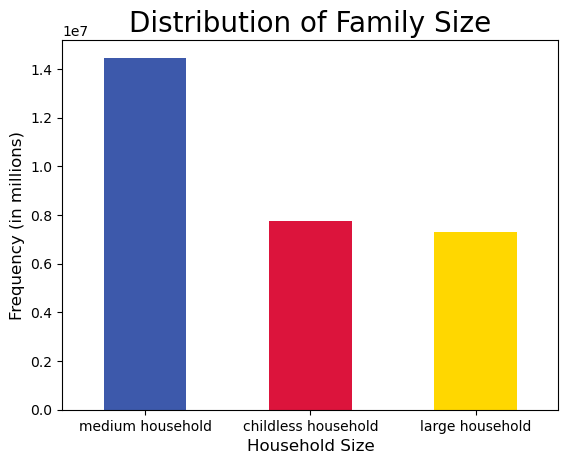

In [55]:
# Creating a bar chart for family_size
bar_family_size = df_ind_adults['family_size'].value_counts().plot.bar(color=['#3D59AB', '#DC143C', '#FFD700'])

plt.title('Distribution of Family Size', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household Size', fontsize = 12)
plt.xticks(rotation = 0)

In [56]:
# Exporting bar_family_size.

bar_family_size.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_size.png'))

#### d) Departments

Text(0.5, 0, 'Department')

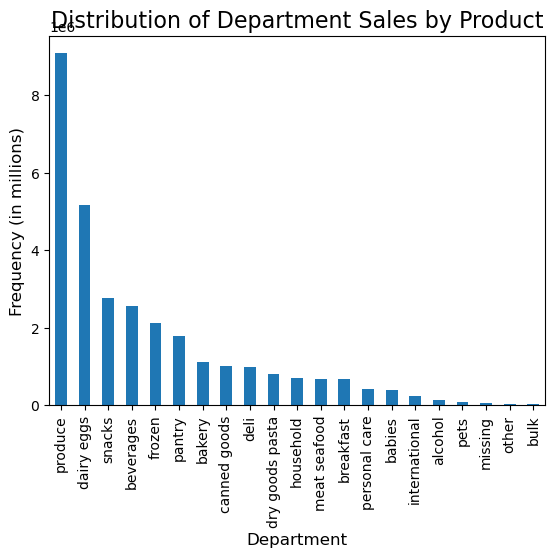

In [19]:
# Create a bar chart for distribution of product sales by department.
bar_departments = df_norm_act['department'].value_counts().plot.bar()

plt.title('Distribution of Department Sales by Product', fontsize = 16)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department', fontsize = 12)

In [20]:
# Exporting bar_departments.

bar_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments.png'), bbox_inches='tight')

### 5. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [56]:
pd.options.display.max_columns = None

In [57]:
# Viewing the dataframe to see best columns to use for usage frequency and expenditure.

df_norm_act[df_norm_act['order_id']=='2398795']

# I can see here that each item in an order (designated by order_id) has an add_to_cart_order, likely based on the 
# order it was added to the cart in the online Instacart store.

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,med_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_children,marital_status,income,region,exclusion_flag,income_level,age_group,department
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages
12,2398795,1,2,3,7,15.0,False,12427,3,1,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,snacks
22,2398795,1,2,3,7,15.0,False,26088,5,1,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,snacks
25,2398795,1,2,3,7,15.0,False,10258,2,0,Pistachios,117,19,3.0,Low-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,snacks
34,2398795,1,2,3,7,15.0,False,13176,4,0,Bag of Organic Bananas,24,4,10.3,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,produce
36,2398795,1,2,3,7,15.0,False,13032,6,0,Cinnamon Toast Crunch,121,14,4.0,Low-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,breakfast


In [58]:
df_norm_act.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,med_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_children,marital_status,income,region,exclusion_flag,income_level,age_group,department
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages


In [59]:
# Checking usage level, using days_since_prior_order, by age group.

df_norm_act.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
middle-aged              10.820312  0.0  30.0
older adult              10.796875  0.0  30.0
oldest old               10.804688  0.0  30.0
young adult              10.812500  0.0  30.0

In [60]:
# Checking usage level, using max_order, by age group.

df_norm_act.groupby('age_group').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                  mean min max
age_group                     
middle-aged  34.416025   5  99
older adult  34.320391   5  99
oldest old   34.430308   5  99
young adult  34.503729   5  99

In [69]:
# Checking item price by age group.

df_norm_act.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
middle-aged  7.791641  1.0  25.0
older adult  7.798797  1.0  25.0
oldest old   7.788414  1.0  25.0
young adult  7.784818  1.0  25.0

In [76]:
# Checking usage level, using days_since_prior_order, by income_level.

df_norm_act.groupby('income_level').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
income_level                                   
high-income                10.757812  0.0  30.0
low-income                 10.960938  0.0  30.0
middle-income              10.757812  0.0  30.0

In [77]:
# Checking usage level, using max_order, by income_level.

df_norm_act.groupby('income_level').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                    mean min max
income_level                    
high-income    34.609884   5  99
low-income     33.696504   5  99
middle-income  34.698195   5  99

In [78]:
# Checking item price by income level.

df_norm_act.groupby('income_level').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_level                      
high-income    7.950707  1.0  25.0
low-income     7.300463  1.0  25.0
middle-income  7.955655  1.0  25.0

In [79]:
# Checking usage level, using days_since_prior_order, by number of dependents. Here, we use the dataframe we
# created with only adults with dependents who were not older children themselves living at home.

df_ind_adults.groupby('family_size').agg({'days_since_prior_order': ['mean', 'min', 'max']})


days_since_prior_order           
                              mean  min   max
age_group                                    
middle-aged              10.820312  0.0  30.0
older adult              10.796875  0.0  30.0
oldest old               10.804688  0.0  30.0
young adult              10.820312  0.0  30.0

In [81]:
df_ind_adults.groupby('family_size').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                          mean min max
family_size                           
childless household  34.675839   5  99
large household      34.337653   5  99
medium household     34.292360   5  99

In [82]:
df_ind_adults.groupby('family_size').agg({'prices': ['mean', 'min', 'max']})

prices           
                         mean  min   max
family_size                             
childless household  7.789550  1.0  25.0
large household      7.790888  1.0  25.0
medium household     7.789971  1.0  25.0

In [84]:
# Saving df_norm_act with customer profile columns.

df_norm_act.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_profiles.pkl'))

In [85]:
df_ind_adults.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_indep_adults.pkl'))